In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [6]:
trades_df = pd.read_csv('historical_data.csv') 
sentiment_df = pd.read_csv('fear&greed.csv')

In [12]:
cols_to_drop = ['Transaction Hash', 'Order ID', 'Trade ID', 'Crossed', 'Timestamp', 'Direction','Fee']
trades_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [30]:
trades_df['clean_time'] = pd.to_datetime(trades_df['Timestamp IST'], dayfirst=True)
trades_df['Join_Date'] = trades_df['clean_time'].dt.strftime('%d/%m/%Y')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], dayfirst=True)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.strftime('%d/%m/%Y')

C:\Users\pihus\AppData\Local\Temp\ipykernel_4264\3269768581.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_analysis.index, y=profit_analysis.values, palette="viridis")


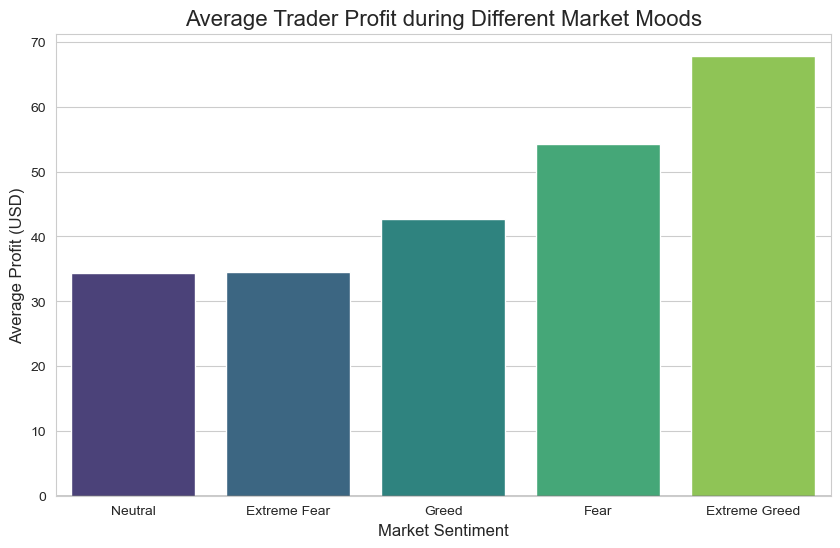


--- AVERAGE Trader profit ---
classification
Neutral          34.307718
Extreme Fear     34.537862
Greed            42.743559
Fear             54.290400
Extreme Greed    67.892861
Name: Closed PnL, dtype: float64


In [64]:
master_df = pd.merge(trades_df, sentiment_df, left_on='Join_Date', right_on='date', how='left')
matches = master_df['classification'].notnull().sum()
total_trades = len(master_df)
profit_analysis = master_df.groupby('classification')['Closed PnL'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_analysis.index, y=profit_analysis.values, palette="viridis")    
plt.title("Average Trader Profit during Different Market Moods", fontsize=16)
plt.xlabel("Market Sentiment", fontsize=12)
plt.ylabel("Average Profit (USD)", fontsize=12)
plt.axhline(0, color='black', linewidth=1) 
plt.show()
print("\n--- AVERAGE Trader profit ---")
print(profit_analysis)

C:\Users\pihus\AppData\Local\Temp\ipykernel_4264\1335936956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_analysis.index, y=risk_analysis.values, palette="rocket")


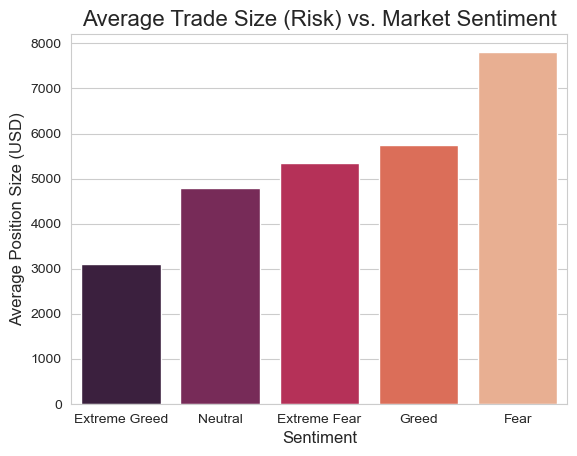


--- AVERAGE BET SIZE (USD) ---
classification
Extreme Greed    3112.251565
Neutral          4782.732661
Extreme Fear     5349.731843
Greed            5736.884375
Fear             7816.109931
Name: Size USD, dtype: float64


In [60]:
risk_analysis = master_df.groupby('classification')['Size USD'].mean().sort_values()

sns.barplot(x=risk_analysis.index, y=risk_analysis.values, palette="rocket")

plt.title("Average Trade Size (Risk) vs. Market Sentiment", fontsize=16)
plt.ylabel("Average Position Size (USD)", fontsize=12)
plt.xlabel("Sentiment", fontsize=12)
plt.show()

print("\n--- AVERAGE BET SIZE (USD) ---")
print(risk_analysis)

C:\Users\pihus\AppData\Local\Temp\ipykernel_4264\235167073.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_analysis.index, y=activity_analysis.values, palette="mako")


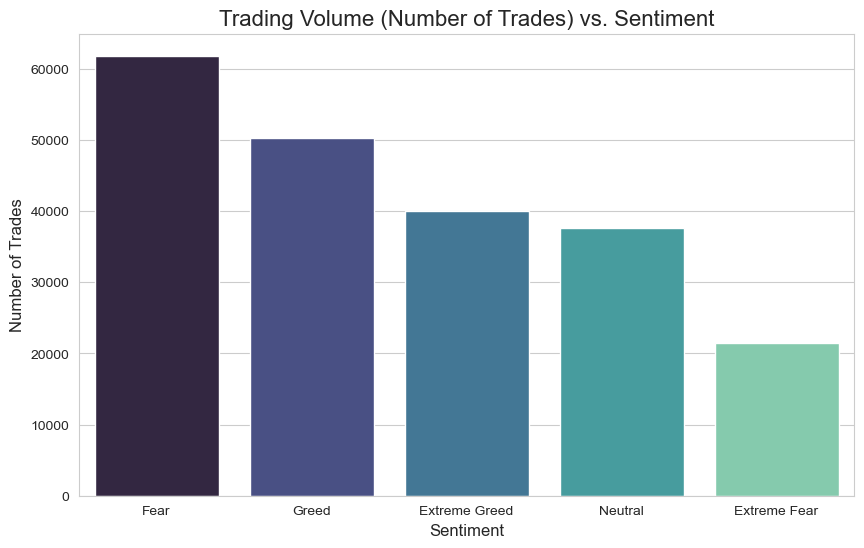


--- NUMBER OF TRADES ---
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [62]:
activity_analysis = master_df['classification'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_analysis.index, y=activity_analysis.values, palette="mako")
plt.title("Trading Volume (Number of Trades) vs. Sentiment", fontsize=16)
plt.ylabel("Number of Trades", fontsize=12)
plt.xlabel("Sentiment", fontsize=12)
plt.show()
print("\n--- NUMBER OF TRADES ---")
print(activity_analysis)